# Project: Heart Disease Prediction
## Problem Definition
> Given the clinical parameters about a patient,predicting whether the patient has heart disease or not.
## Data
>  https://www.kaggle.com/ronitf/heart-disease-uci
  The data has been downloaded from Kaggle.
  

In [97]:
#importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [98]:
df=pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [99]:
df.shape

(303, 14)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [101]:
df.isnull().values.any()

False

In [102]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


* There are a total of 14 features with 303 rows.
* Oldpeak feature is of float data type , all others are of integer datatype.
* There are no null values in any of the feature

C:\users\meghna_2\desktop\ml-course\projects\env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

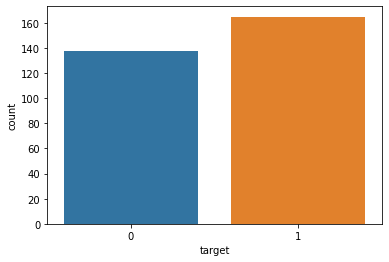

In [103]:
sns.countplot(df.target)

In [104]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

There are 165 people having a heart disease.

It is somewhat balanced data set as there is not so much difference between people having or not having a disease.

<AxesSubplot:>

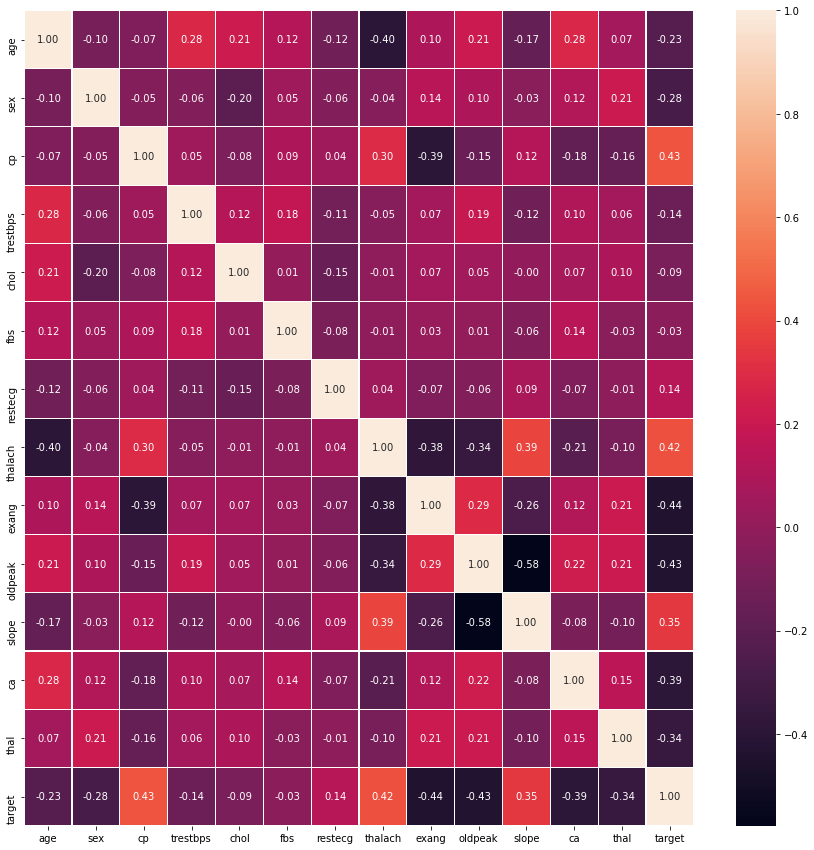

In [105]:
## Analysing the correlation of different features with the target feature
corr_mat=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat,annot=True,fmt='.2f',linewidths=0.2)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

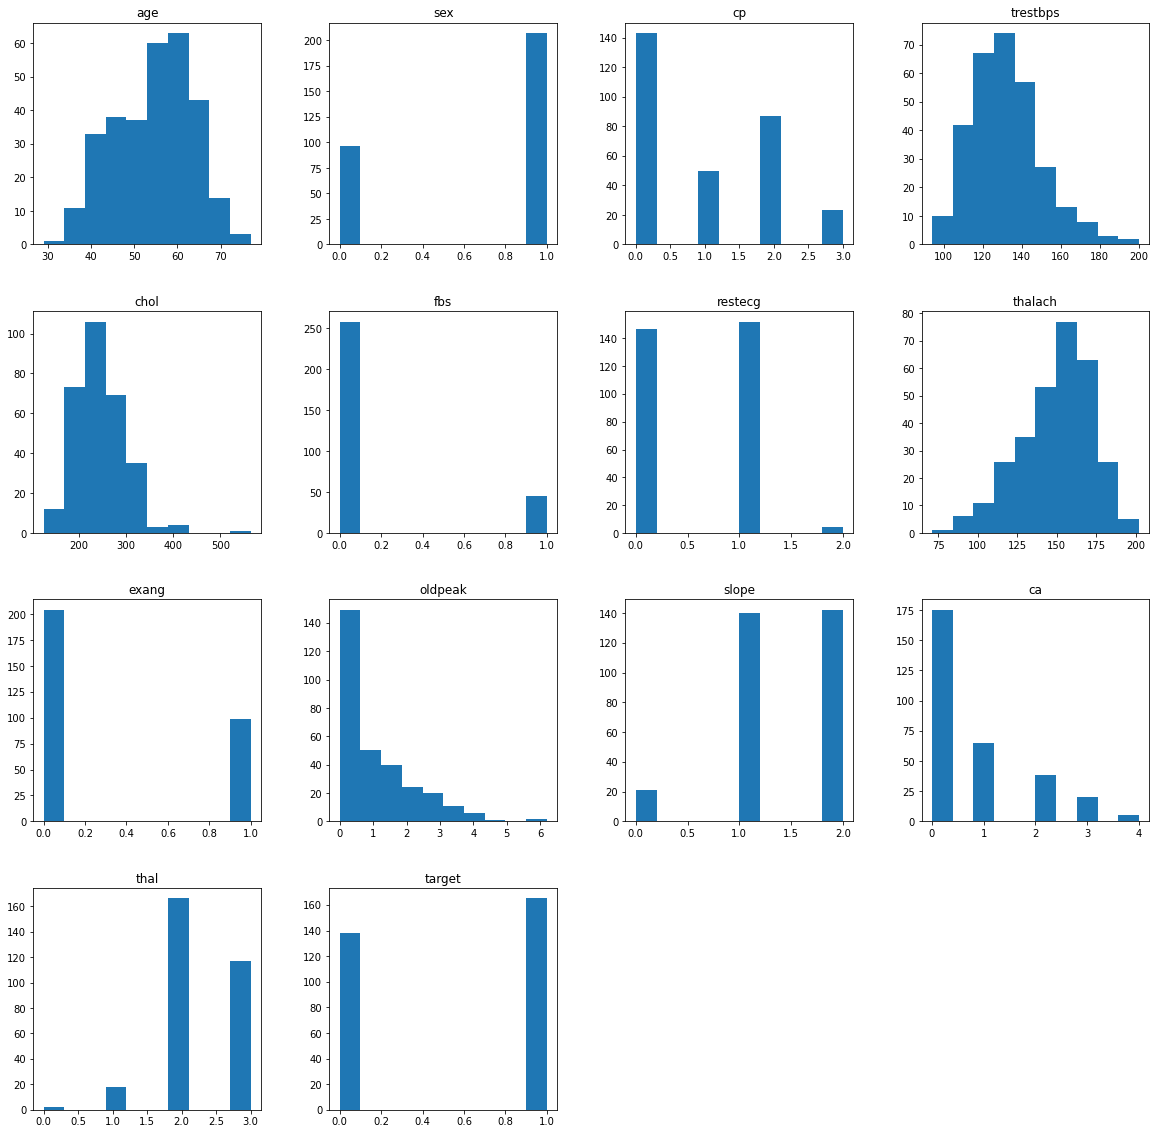

In [106]:
df.hist(grid=False,figsize=(20,20))

In [107]:
sk_features=['age','trestbps','chol','thalach','oldpeak']

Features-{sex,cp,fbs,restecg,exang,slope,thal,target} seems to be categorical.

Checking the categorical features.

In [108]:
cat_features=[col for col in df.columns if len(df[col].unique())<=5]
print(cat_features)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [109]:
## Changing categorical features to numerical variables using one hot encoding
df=pd.get_dummies(df,columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope','ca', 'thal']) 

In [110]:
df

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [111]:
df

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [112]:
#Converting skewed distributtion to normal distribution
#Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[sk_features]=scaler.fit_transform(df[sk_features])

In [113]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>, <AxesSubplot:>]],
      dtype=object)

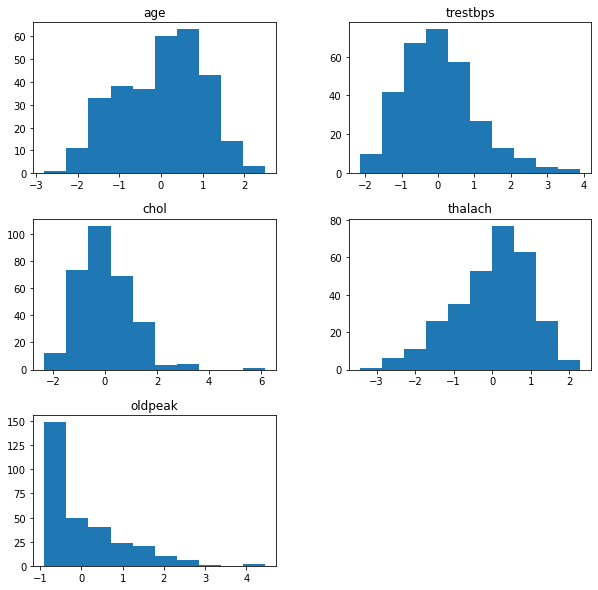

In [114]:
df[sk_features].hist(figsize=(10,10),grid=False)

## Modelling

In [115]:
from sklearn.model_selection import train_test_split

In [133]:
x=df.drop(['target'],axis=1)
y=df['target']

In [212]:
np.random.seed(0)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### KNN

In [384]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
train_scores=[]
test_scores=[]
#lets create a list of different values for n_neighbors
neighbors=range(1,21)
#Setup KNN instance
knn_=KNeighborsClassifier()
#Loop through different values of n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #Fit the algorithm
    knn.fit(x_train,y_train)
    #Update the train_scores
    train_scores.append(cross_val_score(knn,x_train,y_train,cv=10))
    #Update the test_scores
    test_scores.append(cross_val_score(knn,x_test,y_test,cv=10))

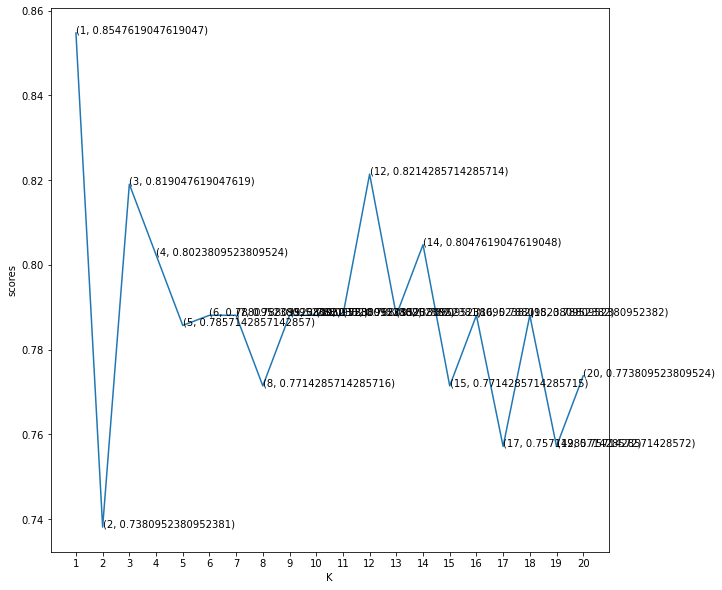

In [385]:
plt.figure(figsize=(10,10))
plt.plot([k for k in range(1,21)],knn_test_scores)
for i in range(1,21):
    plt.text(i,knn_test_scores[i-1],(i,knn_test_scores[i-1]))
plt.xlabel('K')
plt.ylabel('scores');
plt.xticks([k for k in range(1,21)]);

In [386]:
knn_train_scores

[0.7443333333333333,
 0.7565000000000001,
 0.835,
 0.8103333333333333,
 0.8390000000000001,
 0.8223333333333332,
 0.8263333333333334,
 0.8265,
 0.8306666666666667,
 0.8350000000000002,
 0.8305,
 0.8308333333333333,
 0.8226666666666667,
 0.8266666666666668,
 0.8433333333333334,
 0.8391666666666666,
 0.8351666666666666,
 0.8391666666666666,
 0.8391666666666666,
 0.8433333333333334]

In [387]:
knn_test_scores

[0.8547619047619047,
 0.7380952380952381,
 0.819047619047619,
 0.8023809523809524,
 0.7857142857142857,
 0.7880952380952382,
 0.7880952380952382,
 0.7714285714285716,
 0.7880952380952382,
 0.7880952380952382,
 0.7880952380952381,
 0.8214285714285714,
 0.7880952380952382,
 0.8047619047619048,
 0.7714285714285715,
 0.7880952380952382,
 0.7571428571428572,
 0.7880952380952382,
 0.7571428571428572,
 0.773809523809524]

In [396]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)

knn_score=cross_val_score(knn_model,x_test,y_test,cv=10).mean()
knn_score

0.8547619047619047

## Random Forest Classifier

In [341]:
seed=0
np.random.seed(seed)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [342]:
np.random.seed(seed)
rfc_model=RandomForestClassifier(n_estimators=100,min_samples_leaf=)

In [ ]:
rfc_model.fit(x_train,y_train)
rfc_train_score=cross_val_score(rfc_model,x_train,y_train,cv=10)
rfc_test_score=cross_val_score(rfc_model,x_test,y_test,cv=10)
rfc_score=rfc_model.score(x_test,y_test)
rfc_score

In [344]:
rfc_test_score.mean()

0.8380952380952381

In [346]:
rfc_train_score.mean()

0.8146666666666667

seems to be a case of overfitting..tuning hyperparameters to avoid overfitting.

**Using Randomized SearchCV.**

In [390]:
from sklearn.model_selection import RandomizedSearchCV
rfc_rcv={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,4,7,10],
         "min_samples_split":np.arange(2,10,2),
         "min_samples_leaf":np.arange(2,20,2)}
rfc=RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=rfc_rcv,
                       n_iter=20,
                       cv=5,
                       verbose=True,
                       n_jobs=-1,
                       random_state=0)
rfc.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 4, 7, 10],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   random_state=0, verbose=True)

In [391]:
rfc.best_params_

{'n_estimators': 360,
 'min_samples_split': 6,
 'min_samples_leaf': 12,
 'max_depth': 10}

In [392]:
rfc.score(x_train,y_train)

0.8471074380165289

In [407]:
rfc_score=rfc.score(x_test,y_test)
rfc_score

0.8852459016393442

### Logistic Regression

In [373]:
from sklearn.linear_model import LogisticRegression
seed=0
lr_model=LogisticRegression(random_state=seed)
lr_model.fit(x_train,y_train)
lr_train_score=cross_val_score(lr_model,x_train,y_train,cv=10)
lr_test_score=cross_val_score(lr_model,x_test,y_test,cv=10)

In [374]:
lr_train_score.mean()

0.8478333333333333

In [399]:
lr_score=lr_test_score.mean()
lr_score

0.8380952380952381

## For more accuracy tuning Random Forest classifier with Grid Search CV

In [401]:
rfc.best_params_

{'n_estimators': 360,
 'min_samples_split': 6,
 'min_samples_leaf': 12,
 'max_depth': 10}

In [402]:
from sklearn.model_selection import GridSearchCV
rfc_grid={'n_estimators':[200,300,400,350,1000],
          'min_samples_split':[4,6,8,10],
          'min_samples_leaf':[10,12,14],
          'max_depth':[10,20,100]}
rfc_gridcv=GridSearchCV(RandomForestClassifier(),
                        cv=10,
                        param_grid=rfc_grid,
                        n_jobs=-1,
                        verbose=2)
rfc_gridcv.fit(x_train,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 100],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [4, 6, 8, 10],
                         'n_estimators': [200, 300, 400, 350, 1000]},
             verbose=2)

In [404]:
rfc_gridcv.score(x_train,y_train)

0.8471074380165289

In [405]:
rfc_gridcv.score(x_test,y_test)

0.8852459016393442